# 2. Gui Features in OpenCV

## 2.1 Getting Started with Images

### Goal
In this tutorial you will learn how to:

- Read an image from file (using [**cv::imread**](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56))
- Display an image in an OpenCV window (using [**cv::imshow**](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563))
- Write an image to a file (using [**cv::imwrite**](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce))

#### Code at glance:
```python
import cv2 as cv
import sys
img = cv.imread(cv.samples.findFile("starry_night.jpg"))
if img is None:
    sys.exit("Could not read the image.")
cv.imshow("Display window", img)
k = cv.waitKey(0)
if k == ord("s"):
    cv.imwrite("starry_night.png", img)
```

### Explanation
As a first step, the OpenCV python library is imported. The proper way to do this is to additionally assign it the name cv, which is used in the following to reference the library.

In [3]:
import cv2 as cv
import sys

Now, let's analyze the main code. As a first step, we read the image "starry_night.jpg" from the OpenCV samples. In order to do so, a call to the [**cv::imread**](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) function loads the image using the file path specified by the first argument. The second argument is optional and specifies the format in which we want the image. This may be:

- IMREAD_COLOR loads the image in the BGR 8-bit format. This is the **default** that is used here.
- IMREAD_UNCHANGED loads the image as is (including the alpha channel if present)
- IMREAD_GRAYSCALE loads the image as an intensity one
After reading in the image data will be stored in a [**cv::Mat**](https://docs.opencv.org/master/d3/d63/classcv_1_1Mat.html) object.

In [4]:
img = cv.imread(cv.samples.findFile("./images/starry_night.jpg"))

> **Note**
OpenCV offers support for the image formats Windows bitmap (bmp), portable image formats (pbm, pgm, ppm) and Sun raster (sr, ras). With help of plugins (you need to specify to use them if you build yourself the library, nevertheless in the packages we ship present by default) you may also load image formats like JPEG (jpeg, jpg, jpe), JPEG 2000 (jp2 - codenamed in the CMake as Jasper), TIFF files (tiff, tif) and portable network graphics (png). Furthermore, OpenEXR is also a possibility.

Afterwards, a check is executed, if the image was loaded correctly.

In [5]:
if img is None:
    sys.exit("Could not read the image.")

Then, the image is shown using a call to the [**cv::imshow**](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) function. The first argument is the title of the window and the second argument is the [**cv::Mat**](https://docs.opencv.org/master/d3/d63/classcv_1_1Mat.html) object that will be shown.

Because we want our window to be displayed until the user presses a key (otherwise the program would end far too quickly), we use the [**cv::waitKey**](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) function whose only parameter is just how long should it wait for a user input (measured in milliseconds). Zero means to wait forever. The return value is the key that was pressed.


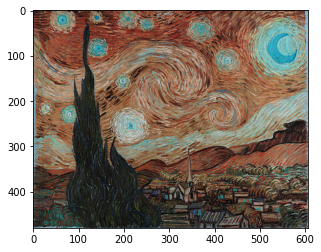

In [8]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()
# cv.imshow("Display window", img)
k = cv.waitKey(0)

In the end, the image is written to a file if the pressed key was the "s"-key. For this the [**cv::imwrite**](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) function is called that has the file path and the [**cv::Mat**](https://docs.opencv.org/master/d3/d63/classcv_1_1Mat.html) object as an argument.

In [9]:
if k == ord("s"):
    cv.imwrite("starry_night.png", img)

## 2.2 Getting Started with Videos

### Goal
- Learn to read video, display video, and save video.
- Learn to capture video from a camera and display it.
- You will learn these functions : [**cv.VideoCapture()**](https://docs.opencv.org/master/d8/dfe/classcv_1_1VideoCapture.html), [**cv.VideoWriter()**](https://docs.opencv.org/master/dd/d9e/classcv_1_1VideoWriter.html)

### Capture Video from Camera
Often, we have to capture live stream with a camera. OpenCV provides a very simple interface to do this. Let's capture a video from the camera (I am using the built-in webcam on my laptop), convert it into grayscale video and display it. Just a simple task to get started.

To capture a video, you need to create a **VideoCapture** object. Its argument can be either the device index or the name of a video file. A device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1). You can select the second camera by passing 1 and so on. After that, you can capture frame-by-frame. But at the end, don't forget to release the capture.

```python
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()
```

`cap.read()` returns a bool (`True`/`False`). If the frame is read correctly, it will be `True`. So you can check for the end of the video by checking this returned value.

Sometimes, cap may not have initialized the capture. In that case, this code shows an error. You can check whether it is initialized or not by the method **cap.isOpened()**. If it is `True`, OK. Otherwise open it using [**cap.open()**](https://docs.opencv.org/master/d6/dee/group__hdf5.html#ga243d7e303690af3c5c3686ca5785205e).

You can also access some of the features of this video using **cap.get(propId)** method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video). Full details can be seen here: [**cv::VideoCapture::get()**](https://docs.opencv.org/master/d8/dfe/classcv_1_1VideoCapture.html#aa6480e6972ef4c00d74814ec841a2939). Some of these values can be modified using **cap.set(propId, value)**. Value is the new value you want.

For example, I can check the frame width and height by `cap.get(cv.CAP_PROP_FRAME_WIDTH)` and `cap.get(cv.CAP_PROP_FRAME_HEIGHT)`. It gives me 640x480 by default. But I want to modify it to 320x240. Just use `ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,320)` and `ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT,240)`.

> **Note**
If you are getting an error, make sure your camera is working fine using any other camera application (like Cheese in Linux).

### Playing Video from file
Playing video from file is the same as capturing it from camera, just change the camera index to a video file name. Also while displaying the frame, use appropriate time for `cv.waitKey()`. If it is too less, video will be very fast and if it is too high, video will be slow (Well, that is how you can display videos in slow motion). 25 milliseconds will be OK in normal cases.
```python
import numpy as np
import cv2 as cv
cap = cv.VideoCapture('vtest.avi')
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()
```

> **Note**
Make sure a proper version of ffmpeg or gstreamer is installed. Sometimes it is a headache to work with video capture, mostly due to wrong installation of ffmpeg/gstreamer.

### Saving a Video
So we capture a video and process it frame-by-frame, and we want to save that video. For images, it is very simple: just use `cv.imwrite()`. Here, a little more work is required.

This time we create a **VideoWriter** object. We should specify the output file name (eg: output.avi). Then we should specify the FourCC code (details in next paragraph). Then number of frames per second (fps) and frame size should be passed. And the last one is the isColor flag. If it is `True`, the encoder expect color frame, otherwise it works with grayscale frame.

[FourCC](https://en.wikipedia.org/wiki/FourCC) is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. The following codecs work fine for me.

- In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
- In Windows: DIVX (More to be tested and added)
- In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).
FourCC code is passed as `cv.VideoWriter_fourcc('M','J','P','G')` or `cv.VideoWriter_fourcc(*'MJPG')` for MJPG.

The below code captures from a camera, flips every frame in the vertical direction, and saves the video.

```python
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()
```

## 2.3 Drawing Functions in OpenCV

### Goal
- Learn to draw different geometric shapes with OpenCV
- You will learn these functions : [**cv.line()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2), [**cv.circle()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) , [**cv.rectangle()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9), [**cv.ellipse()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga28b2267d35786f5f890ca167236cbc69), [**cv.putText()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576) etc.

### Code
In all the above functions, you will see some common arguments as given below:

- img : The image where you want to draw the shapes
- color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.
- thickness : Thickness of the line or circle etc. If **-1** is passed for closed figures like circles, it will fill the shape. default thickness = 1
- lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. [**cv.LINE_AA**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ggaf076ef45de481ac96e0ab3dc2c29a777a85fdabe5335c9e6656563dfd7c94fb4f) gives anti-aliased line which looks great for curves.

### Drawing Line
To draw a line, you need to pass starting and ending coordinates of line. We will create a black image and draw a blue line on it from top-left to bottom-right corners.
```python
import numpy as np
import cv2 as cv
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
```
### Drawing Rectangle
To draw a rectangle, you need top-left corner and bottom-right corner of rectangle. This time we will draw a green rectangle at the top-right corner of image.
```
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
```
### Drawing Circle
To draw a circle, you need its center coordinates and radius. We will draw a circle inside the rectangle drawn above.
```
cv.circle(img,(447,63), 63, (0,0,255), -1)
```
### Drawing Ellipse
To draw the ellipse, we need to pass several arguments. One argument is the center location (x,y). Next argument is axes lengths (major axis length, minor axis length). angle is the angle of rotation of ellipse in anti-clockwise direction. startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction from major axis. i.e. giving values 0 and 360 gives the full ellipse. For more details, check the documentation of [**cv.ellipse()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga28b2267d35786f5f890ca167236cbc69). Below example draws a half ellipse at the center of the image.
```
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
```
### Drawing Polygon
To draw a polygon, first you need coordinates of vertices. Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32. Here we draw a small polygon of with four vertices in yellow color.
```
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
```
> **Note**
If third argument is False, you will get a polylines joining all the points, not a closed shape.
[**cv.polylines()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga1ea127ffbbb7e0bfc4fd6fd2eb64263c) can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually. It is a much better and faster way to draw a group of lines than calling [**cv.line()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2) for each line.

### Adding Text to Images:
To put texts in images, you need specify following things.

Text data that you want to write
Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
Font type (Check [**cv.putText()**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576) docs for supported fonts)
Font Scale (specifies the size of font)
regular things like color, thickness, lineType etc. For better look, lineType = [**cv.LINE_AA**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ggaf076ef45de481ac96e0ab3dc2c29a777a85fdabe5335c9e6656563dfd7c94fb4f) is recommended.
We will write **OpenCV** on our image in white color.
```
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
```
### Result
So it is time to see the final result of our drawing. As you studied in previous articles, display the image to see it.
![line](./images/line.png)

### Additional Resources
The angles used in ellipse function is not our circular angles. For more details, visit [this discussion](https://answers.opencv.org/question/14541/angles-in-ellipse-function/).
### Exercises
1. Try to create the logo of OpenCV using drawing functions available in OpenCV.

## 2.4 Mouse as a Paint-Brush

### Goal
- Learn to handle mouse events in OpenCV
- You will learn these functions : [**cv.setMouseCallback()**](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga89e7806b0a616f6f1d502bd8c183ad3e)

### Simple Demo
Here, we create a simple application which draws a circle on an image wherever we double-click on it.

First we create a mouse callback function which is executed when a mouse event take place. Mouse event can be anything related to mouse like left-button down, left-button up, left-button double-click etc. It gives us the coordinates (x,y) for every mouse event. With this event and location, we can do whatever we like. To list all available events available, run the following code in Python terminal:
```python
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )
```
Creating mouse callback function has a specific format which is same everywhere. It differs only in what the function does. So our mouse callback function does one thing, it draws a circle where we double-click. So see the code below. Code is self-explanatory from comments :
```python
import numpy as np
import cv2 as cv
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()
```
### More Advanced Demo
Now we go for a much better application. In this, we draw either rectangles or circles (depending on the mode we select) by dragging the mouse like we do in Paint application. So our mouse callback function has two parts, one to draw rectangle and other to draw the circles. This specific example will be really helpful in creating and understanding some interactive applications like object tracking, image segmentation etc.
```python
import numpy as np
import cv2 as cv
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
```
Next we have to bind this mouse callback function to OpenCV window. In the main loop, we should set a keyboard binding for key 'm' to toggle between rectangle and circle.
```python
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv.destroyAllWindows()
```
### Additional Resources
### Exercises
1. In our last example, we drew filled rectangle. You modify the code to draw an unfilled rectangle.

## 2.5 Trackbar as the Color Palette

### Goal
- Learn to bind trackbar to OpenCV windows
- You will learn these functions : [**cv.getTrackbarPos()**](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga122632e9e91b9ec06943472c55d9cda8), [**cv.createTrackbar()**](https://docs.opencv.org/master/d7/dfc/group__highgui.html#gaf78d2155d30b728fc413803745b67a9b) etc.
Code Demo
Here we will create a simple application which shows the color you specify. You have a window which shows the color and three trackbars to specify each of B,G,R colors. You slide the trackbar and correspondingly window color changes. By default, initial color will be set to Black.

For [**cv.createTrackbar()**](https://docs.opencv.org/master/d7/dfc/group__highgui.html#gaf78d2155d30b728fc413803745b67a9b) function, first argument is the trackbar name, second one is the window name to which it is attached, third argument is the default value, fourth one is the maximum value and fifth one is the callback function which is executed every time trackbar value changes. The callback function always has a default argument which is the trackbar position. In our case, function does nothing, so we simply pass.

Another important application of trackbar is to use it as a button or switch. OpenCV, by default, doesn't have button functionality. So you can use trackbar to get such functionality. In our application, we have created one switch in which application works only if switch is ON, otherwise screen is always black.
```python
import numpy as np
import cv2 as cv
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')
# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows()
```
The screenshot of the application looks like below :
![pallet](./images/pallet.png)

### Exercises
1. Create a Paint application with adjustable colors and brush radius using trackbars. For drawing, refer previous tutorial on mouse handling.


In [10]:
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline

In [11]:
import cv2
img = cv2.imread('./images/affine.jpg', 1)

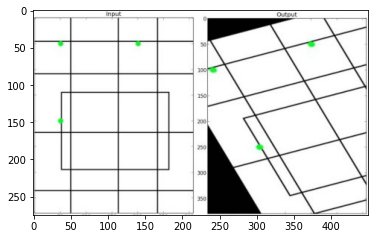

In [12]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [16]:
import cv2
from IPython.display import display, Image

video = cv2.VideoCapture('../SimpleProjects/assets/video.mp4')
display_handle=display(None, display_id=True)
try:
    while True:
        _, frame = video.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tostring()))
except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)

None

/home/mgh/anaconda3/envs/pycv/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  # This is added back by InteractiveShellApp.init_path()


error: OpenCV(4.1.2) /io/opencv/modules/imgcodecs/src/loadsave.cpp:877: error: (-215:Assertion failed) !image.empty() in function 'imencode'


In [17]:
import cv2

# cv2a.videoio_registry.getBackends() returns list of all available backends.
availableBackends = [cv2.videoio_registry.getBackendName(b) for b in cv2.videoio_registry.getBackends()]
print(availableBackends)

# Returns list of available backends which works via cv::VideoCapture(int index)
availableCameraBackends = [cv2.videoio_registry.getBackendName(b) for b in cv2.videoio_registry.getCameraBackends()]
print(availableBackends)

['FFMPEG', 'GSTREAMER', 'INTEL_MFX', 'V4L2', 'CV_IMAGES', 'CV_MJPEG']
['FFMPEG', 'GSTREAMER', 'INTEL_MFX', 'V4L2', 'CV_IMAGES', 'CV_MJPEG']


In [19]:
import cv2

deviceId = "/dev/video0"

# videoCaptureApi = cv2.CAP_ANY       # autodetect default API
videoCaptureApi = cv2.CAP_FFMPEG
# videoCaptureApi = cv2.CAP_GSTREAMER 
cap = cv2.VideoCapture("/dev/video2", videoCaptureApi)

cap = cv2.VideoCapture(deviceId)
cap.open(deviceId)
if not cap.isOpened():
    raise RuntimeError("ERROR! Unable to open camera")

try:
    while True:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:        
    cap.release()
    cv2.destroyAllWindows()

RuntimeError: ERROR! Unable to open camera

In [27]:
import os
import tempfile
import subprocess
import cv2
import numpy as np

# To get this path execute:
#    $ which ffmpeg
FFMPEG_BIN = '/usr/bin/ffmpeg'


# To find allowed formats for the specific camera:
#    $ ffmpeg -f v4l2 -list_formats all -i /dev/video3
#    ...
#    [video4linux2,v4l2 @ 0x5608ac90af40] Raw: yuyv422: YUYV 4:2:2: 640x480 1280x720 960x544 800x448 640x360 424x240 352x288 320x240 800x600 176x144 160x120 1280x800
#    ...

def run_ffmpeg(fifo_path):
    ffmpg_cmd = [
        FFMPEG_BIN,
        '-i', '/dev/video2',
        '-video_size', '640x480',
        '-pix_fmt', 'bgr24',        # opencv requires bgr24 pixel format
        '-vcodec', 'rawvideo',
        '-an','-sn',                # disable audio processing
        '-f', 'image2pipe',
        '-',                        # output to go to stdout
    ]
    return subprocess.Popen(ffmpg_cmd, stdout = subprocess.PIPE, bufsize=10**8)

def run_cv_window(process):
    while True:
        # read frame-by-frame
        raw_image = process.stdout.read(640*480*3)
        if raw_image == b'':
            raise RuntimeError("Empty pipe")
        
        # transform the bytes read into a numpy array
        frame =  np.frombuffer(raw_image, dtype='uint8')
        frame = frame.reshape((480,640,3)) # height, width, channels
        if frame is not None:
            cv2.imshow('Video', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        process.stdout.flush()
    
    cv2.destroyAllWindows()
    process.terminate()
    print(process.poll())

def run():
    ffmpeg_process = run_ffmpeg()
    run_cv_window(ffmpeg_process)

run()

TypeError: run_ffmpeg() missing 1 required positional argument: 'fifo_path'

In [24]:
cap = cv2.VideoCapture("/dev/video2", cv2.CAP_GSTREAMER)